In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import griddata


In [3]:
df=pd.read_csv('IRIS.csv')

In [4]:
x_col = 'sepal length (cm)'
y_col = 'sepal width (cm)'

In [7]:
# Show numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nAvailable numeric columns:")
for i, col in enumerate(numeric_cols, start=1):
    print(f"{i}. {col}")



Available numeric columns:
1. sepal_length
2. sepal_width
3. petal_length
4. petal_width


In [8]:
# ---- User selection ----
x_col = input("\nEnter column name for X-axis: ").strip()
y_col = input("Enter column name for Y-axis: ").strip()

In [9]:
# Validate column names
while x_col not in df.columns or y_col not in df.columns:
    print("❌ Invalid column name(s). Please enter from the list above.")
    x_col = input("Enter column name for X-axis: ").strip()
    y_col = input("Enter column name for Y-axis: ").strip()


In [10]:
# ---- Prepare data ----
x = df[x_col]
y = df[y_col]
z = x * y  # Example numeric relationship

In [11]:
# Create grid for contour
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

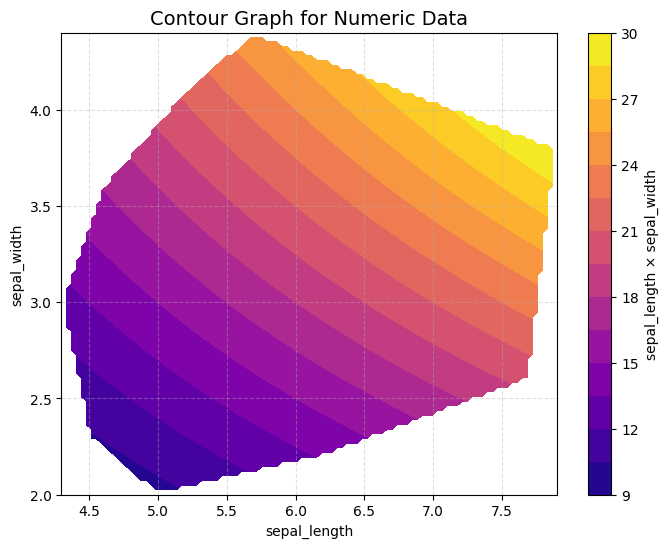

In [12]:
# ---- Plot contour ----
plt.figure(figsize=(8, 6))
contour = plt.contourf(Xi, Yi, Zi, cmap='plasma', levels=15)
plt.colorbar(contour, label=f"{x_col} × {y_col}")

plt.title("Contour Graph for Numeric Data", fontsize=14)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(alpha=0.4, linestyle='--')
plt.show()